In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
# Step 1: Load the dataset from a local CSV file
def load_data_from_csv(file_path):
    # Load the CSV file into a pandas DataFrame
    data = pd.read_csv(file_path)
    return data


In [3]:
# Step 2: Create a directed graph from the dataset
def create_graph_from_data(data):
    G = nx.DiGraph()

    # Assuming the dataset contains 'follower' and 'followee' columns
    for _, row in data.iterrows():
        follower = row['from']
        followee = row['to']
        G.add_edge(follower, followee)

    return G


In [4]:
# Step 3: Apply TwitterRank (PageRank)
def apply_twitter_rank(graph, alpha=0.85, max_iter=100, tol=1e-6):
    pagerank = nx.pagerank(graph, alpha=alpha, max_iter=max_iter, tol=tol)
    return pagerank


In [5]:
# Step 4: Visualize the Graph
def visualize_graph(graph):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph)  # Positioning for better layout
    nx.draw(graph, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
    plt.title("TwitterRank Graph (Followers-Followees)")
    plt.show()


In [6]:
# Step 5: Visualize the TwitterRank Scores
def visualize_ranking(ranking):
    sorted_ranking = sorted(ranking.items(), key=lambda x: x[1], reverse=True)
    users, scores = zip(*sorted_ranking)

    plt.figure(figsize=(10, 6))
    plt.barh(users, scores, color='skyblue')
    plt.xlabel('TwitterRank Score')
    plt.ylabel('Users')
    plt.title('TwitterRank Scores of Users')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest ranked at the top
    plt.show()


In [7]:
# Display the ranked users with ranks, scores (full score without limiting decimals)
def display_ranking(ranking):
    sorted_ranking = sorted(ranking.items(), key=lambda x: x[1], reverse=True)
    print("Rank | User    | Score")
    print("-----------------------")
    for rank, (user, score) in enumerate(sorted_ranking, start=1):
        print(f"{rank:<4} | {user:<7} | {score}")


In [8]:
# Main function
def main(file_path):
    # Load the dataset from CSV file
    data = load_data_from_csv(file_path)

    # Create a graph from the dataset
    graph = create_graph_from_data(data)

    # Apply TwitterRank (PageRank)
    ranking = apply_twitter_rank(graph)

    # Display the ranking
    display_ranking(ranking)

    # Visualize the graph
    visualize_graph(graph)

    # Visualize the ranking
    visualize_ranking(ranking)


Rank | User    | Score
-----------------------
1    | 4313    | 0.014192729187812756
2    | 2425    | 0.010848501107705449
3    | 4337    | 0.00828413799924813
4    | 1199    | 0.007957564902743509
5    | 4338    | 0.007906940202179694
6    | 3743    | 0.0071669855294104355
7    | 208     | 0.007122456484673047
8    | 3653    | 0.0070404974144493175
9    | 3948    | 0.0068893430003092344
10   | 1749    | 0.006785353110180527
11   | 4277    | 0.005960741121433554
12   | 3972    | 0.005438047516585635
13   | 3981    | 0.00506868360872337
14   | 4285    | 0.005040393014893792
15   | 3237    | 0.0048897411905364134
16   | 1800    | 0.0047707951411416856
17   | 4169    | 0.0045087821505740595
18   | 3534    | 0.004251659789533672
19   | 3316    | 0.004235094106586252
20   | 4328    | 0.004158338857312995
21   | 3973    | 0.004031159033223688
22   | 4121    | 0.003839625132609433
23   | 3184    | 0.0038117051959229518
24   | 3369    | 0.0037989340282102374
25   | 4151    | 0.0035107199980370

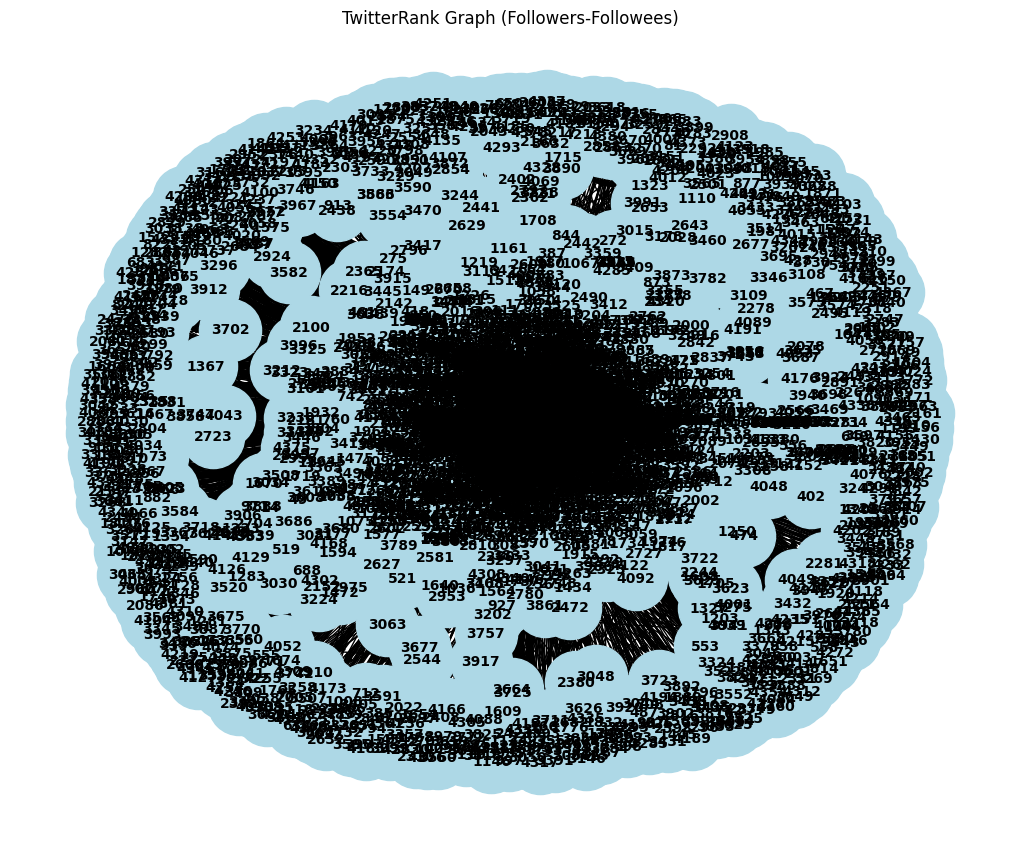

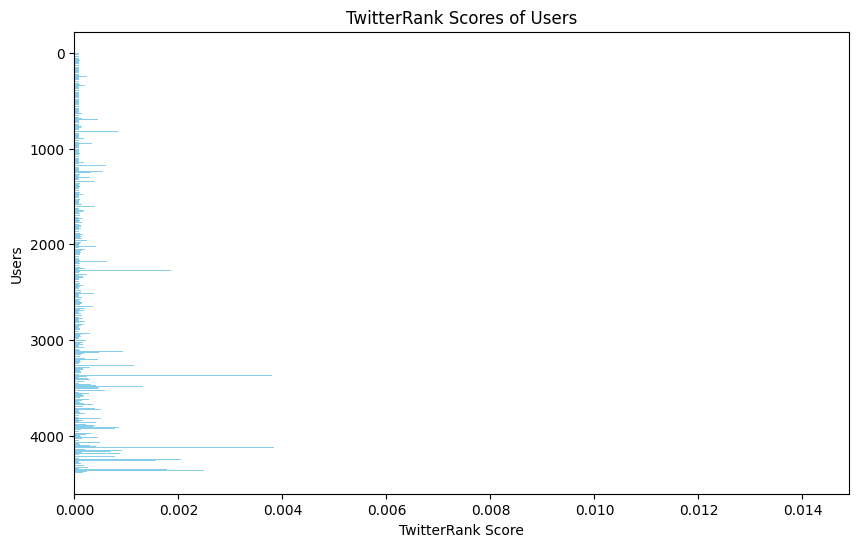

In [13]:
# Run the main function with the path to your CSV file
file_path = '/content/sample_data/musae_RU_edges.csv'  # Update this with your CSV file path
main(file_path)